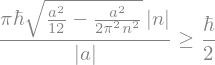

In [3]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
sp.init_printing()

In [4]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

$$\frac{d^2\psi(x)}{dx^2} = -k^2\psi(x)$$

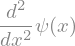

In [5]:
psi(x).diff(x, x)

In [6]:
-k**2 * psi(x)

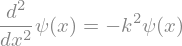

In [7]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [8]:
sp.dsolve(eq, psi(x))

In [9]:
sp.dsolve(eq, psi(x), ics={psi(0): 0, psi(a): 0})

In [10]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol

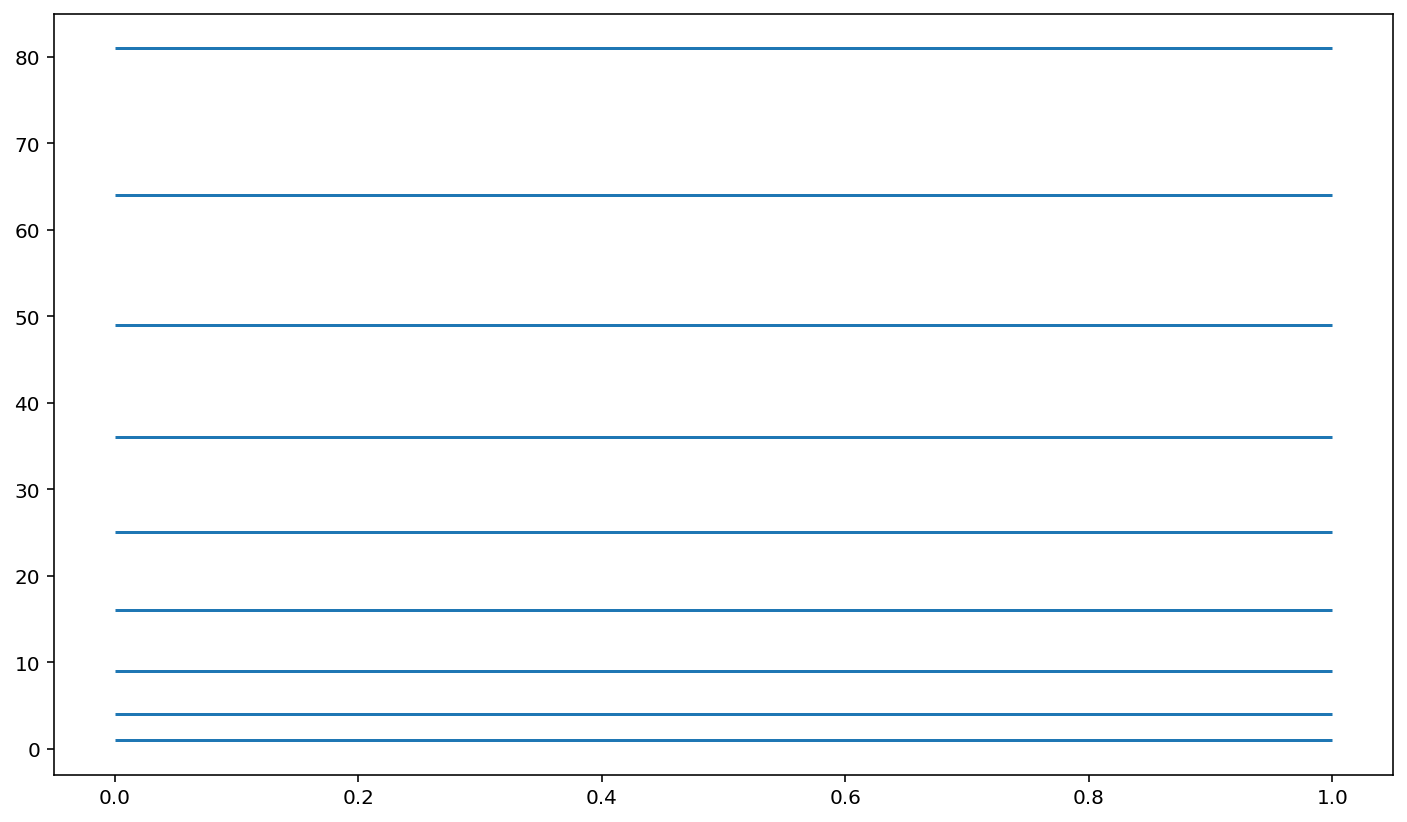

In [11]:
plt.hlines(np.arange(1, 10)**2, 0, 1)

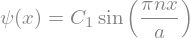

In [12]:
sol = sol.subs(k, n * sp.pi / a)
sol

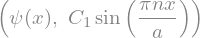

In [13]:
sol.lhs, sol.rhs

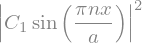

In [14]:
sp.Abs(sol.rhs)**2

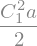

In [15]:
sp.integrate(sol.rhs**2, (x, 0, a))

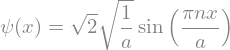

In [16]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

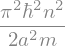

In [17]:
En = n**2 * sp.pi**2 * h**2 / (2 * m * a**2)
En

In [18]:
phi = sp.exp(-sp.I * En * t / h)
phi

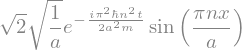

In [19]:
Psi = sol.rhs * phi
Psi

In [20]:
Psif = lambdify((x, t, n), Psi.subs({a: 1, m: 1, h: 1}))
Psif

<function _lambdifygenerated(x, t, n)>

In [21]:
Psif(0.3, 2.3, 1)

(0.3971182633717983+1.0729930471683005j)

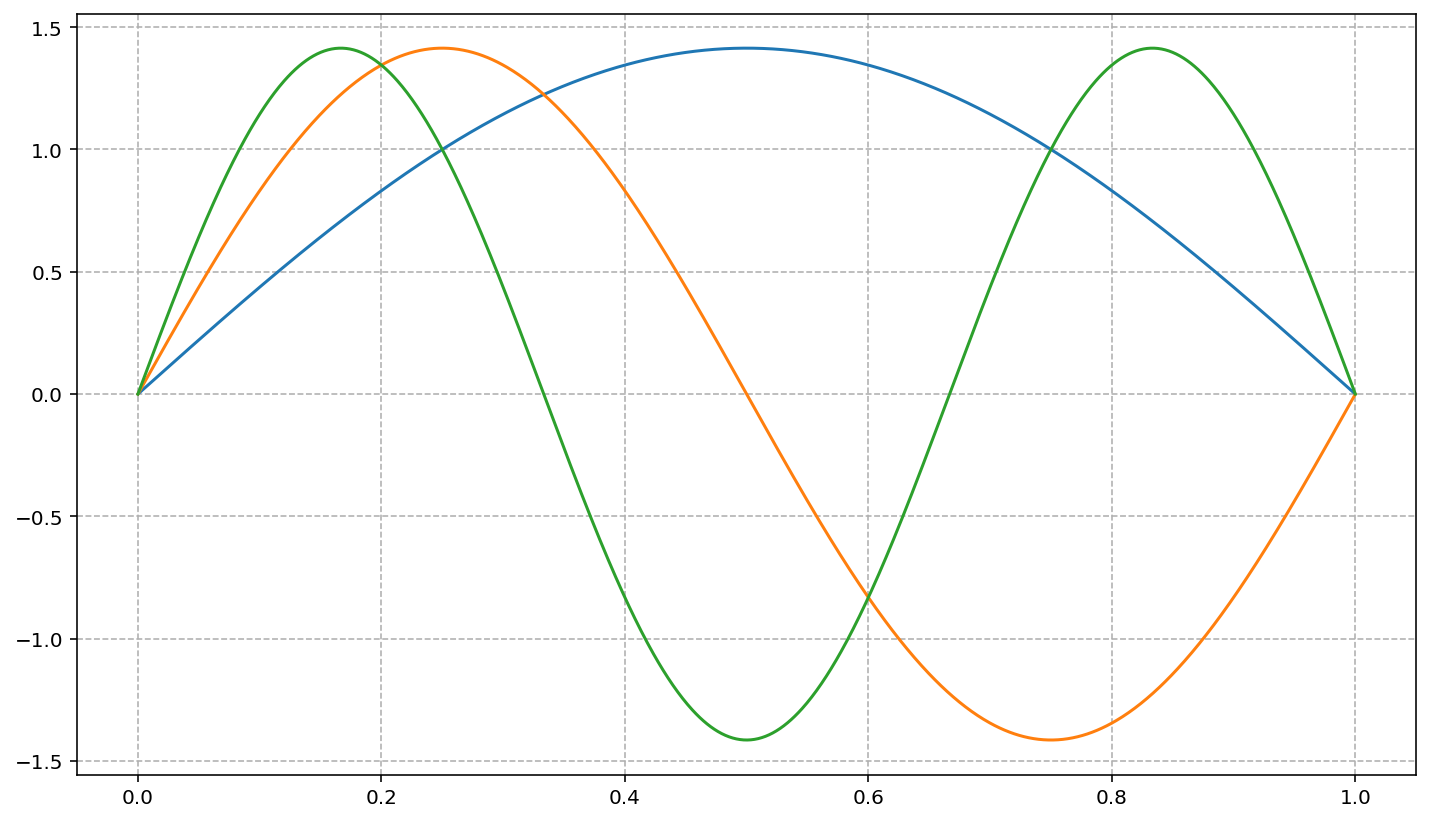

In [22]:
xs = np.linspace(0, 1, 1000)

plt.grid(linestyle='--')

ys = Psif(xs, 0, 1).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 2).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 3).real
plt.plot(xs, ys)

$$<\omega>=\int \Psi^{*} \hat{\omega} \Psi\ dx$$

W stanie stacjonarnym
$$<\omega>=\int \psi^{*} \hat{\omega} \psi\ dx$$

$$\hat{x}=x$$



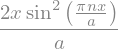

In [23]:
sol.rhs * x * sol.rhs

In [24]:
iks = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()

In [25]:
kwaiks = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()

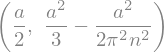

In [26]:
iks, kwaiks

$$\sigma_X^2=<x^2>-<x>^2$$

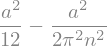

In [27]:
variks = kwaiks - iks**2
variks

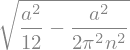

In [33]:
sp.sqrt(variks)

$$<p>=?$$

$$<p^2>=?$$

$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.




$$
\hat{p}= -i\hbar\nabla
$$




$$
\hat{p}= -i\hbar \frac{\partial}{\partial x
}
$$



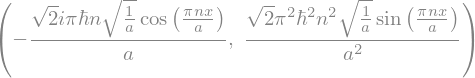

In [43]:
operP = -sp.I * h * sol.rhs.diff(x)
operPkwa = (-sp.I * h)**2 * sol.rhs.diff(x, x)
operP, operPkwa

In [44]:
pe = sp.integrate(sol.rhs * operP * sol.rhs, (x, 0, a)).simplify()
pe

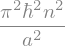

In [45]:
kwape = sp.integrate(sol.rhs * operPkwa, (x, 0, a)).simplify()
kwape

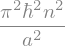

In [46]:
varpe = kwape - pe**2
varpe

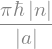

In [47]:
sp.sqrt(varpe)

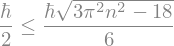

In [48]:
(sp.sqrt(variks) * sp.sqrt(varpe) >= h/2).simplify()

Po uproszczeniu nierówności otrzymujemy:



$$
|n| \geq \frac{3}{\pi}
$$



Powyższa nierówność jest prawdziwa dla wszystkich n większych od 1 =&gt; zasada nieoznaczoności działa :smiley:
